<a href="https://colab.research.google.com/github/ronaldolg26/Efeito_drones_saopaulo/blob/main/Drone_ecommerce_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EFEITOS DOS DRONES NO E-COMMERCE EM SÃO PAULO

---


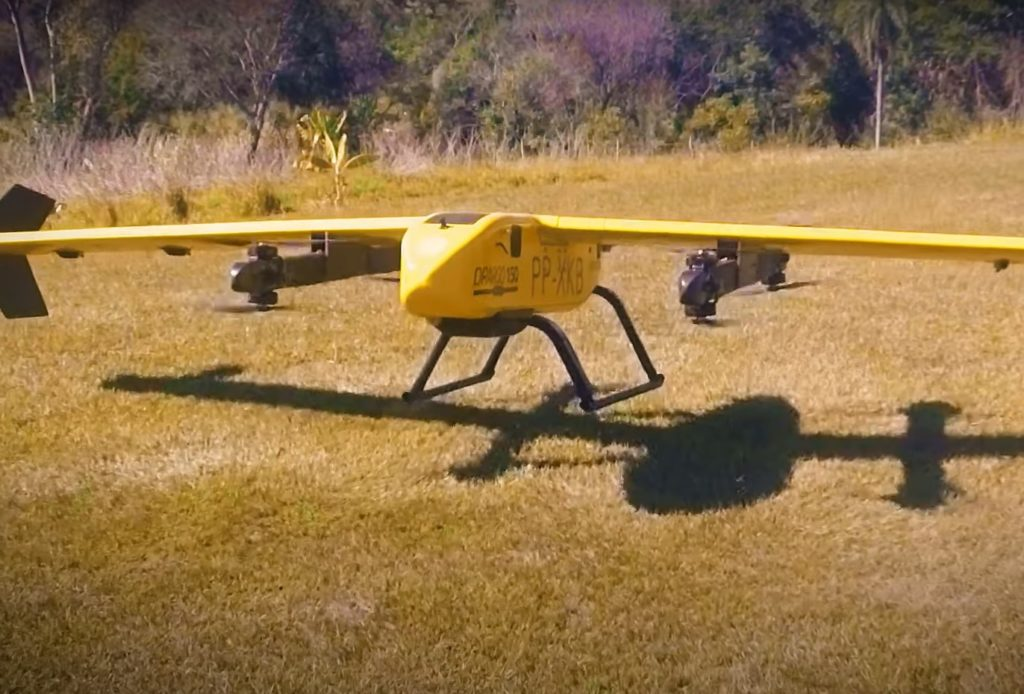

# SEÇÕES
## 1. INTRODUÇÃO
### 1.1 Cenário Brasileiro
### 1.2 O que esse Notebook propõe?
## 2. DADOS
### 2.1 Bibliotecas
### 2.2 Extração de Dados
### 2.3 Dicionário de Atributos
### 2.4 Tratando os Dados
#### 2.4.1 Dados de São Paulo
#### 2.4.2 Dados nulos
#### 2.4.3 Conversão de Dados
#### 2.4.4 Outliers e Valores inaplicáveis
#### 2.4.5 Dados de Georreferenciamento
#### 2.4.6 Distância percorrida.
## 3. DRONES
## 4. RESULTADOS
###4.1 Número de viagens
###4.2 Áreas de maior tráfego
###4.3 Redução do tempo de entrega
###4.4 Distância percorrida por cada modelo
###4.5 Uma visão sobre os fretes
###4.6 Maior movimentação de valores
## 5. CONCLUSÕES

# 1. INTRODUÇÃO

Dês do início das civilizações, a troca de informações é algo em constante evolução. Na Pérsia antiga, por exemplo, surgiu o que pode ser considerado o primeiro correio do mundo. Com centenas de estações espalhadas por todo o reinado, os mensageiros montados a cavalo iam de um lugar a outro levando mensagens. Na França, em meados de 1653, as distâncias de 250km eram percorridas em 2 dias. Além disso, a mais fascinante das formas de transmitir algo para alguém era feita pela utilização dos pombos-correios que chegavam a velocidade de 70km/h.

Hoje, o transporte de mercadoria é feito através dos mais diversos meios de transporte. Navios, aviões, carros, motos, bicicletas e até patins entram na lista do modo de executar essa tarefa. Com o barateamento de novas tecnologias, um novo meio de transporte vem ganhado destaque nesse cenário pela sua eficiência e agilidade. Drones são aeronaves não tripuladas de diversos tamanhos e velocidades que possuem uma variedade grande de utilizações, desde captação de imagens para eventos, transmissões para atividades jornalísticas, pulverização de agrotóxico em lavouras, uso militares, reconhecimento geográfico, delivery, entre outros.


## 1.1 Cenário Brasleiro

  O brasil é um dos pioneiros na utilização de drones nos mais diversos segmentos, contendo empresas com mais de 10 anos de mercado. De acordo com a Agência Nacional de Aviação Civil (ANAC), as aeronaves remotamente pilotadas (RPA) são as aeronaves não tripuladas utilizadas para fins experimentais, comerciais ou institucionais. Estas operações dependem do Certificado de Aeronavegabilidade Especial de RPA – CAER bem como a conformidade com os regulamentos aplicáveis da ANAC, em especial o distanciamento de 30 metros laterais de pessoas não anuentes e a necessidade de se realizar avaliação de risco operacional, dentre outras. Segundo dados da agência, em Abri de 2022, mais de 93 mil drones estavam cadastrados.

  Dentre uma das maiores empresas, não apenas do Brasil, mas sim da américa-latina, a Xmobots possui especialização no desenvolvimento e fabricação de diversos modelos de RPA que atuam dês do agronegócio e segurança até o delivery.  Com uma lista extensa de certificações, tais como a 1º empresa autorizada a realizar operações comerciais acima de 120m ou o primeiro certificado de piloto de drones acima de 400 pés e BLVOS, parece-me viável fazer um estudo utilizando um de seus modelos.


##1.2 O Que Esse Notebook Propõe?

Esse notebook propõe estimar os impactos que essa nova tecnologia causará no e-commerce brasileiro. Buscaremos estimar a redução do tempo de entrega, o efeito no frete, regiões de maior tráfego de drones, entre outros pontos. Para essa análise utilizaremos os padrões de velocidade, carga e distância de modelos fictícios do DRARGO, drone criado pela XMobots destinado ao transporte de cargas de longas distâncias. Os padrões utiizados são: 
1.   DRARGO-1: Carga de até **41kg** e distância de **100km**. 
2.   DRARGO-2: Carga de até **37kg** e distância de **200km**.
3.   DRARGO-3: Carga de até **34kg** e distância de **300km**.
4.   DRARGO-4: Carga de até **30kg** e distância de **400km**.
5.   DRARGO-5: Carga de até **17kg** e distância de **700km**.






Ainda, os dados do e-commerce utilizados são dados reais das marketplaces que hospedam seus dados na [Olist](https://olist.com/pt-br/), empresa que gentilmente cedeu seus dados de forma pública no [Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce). "O conjunto de dados tem informações de 100 mil pedidos de 2016 a 2018 feitos em vários marketplaces no Brasil. Suas funcionalidades permitem visualizar um pedido a partir de múltiplas dimensões: desde o status do pedido, preço, pagamento e desempenho do frete até a localização do cliente, atributos do produto e, finalmente, avaliações escritas pelos clientes. Também lançamos um conjunto de dados de geolocalização que relaciona os CEPs brasileiros às coordenadas lat/lng. Estes são dados comerciais reais, foram anonimizados e as referências às empresas e parceiros no texto da revisão foram substituídas pelos nomes das grandes casas de Game of Thrones." Filtraremos os dados para o estado de São Paulo já que é o estado que tem o maior fluxo de compras do pais e o maior número de drones registrados de acordo com a ANAC.

# 2. DADOS

## 2.1 Bibliotecas

Antes de extrairmos os dados será necessário importarmos as bibliotecas.

In [1]:
#Bibliotecas necessárias
!pip install pywaffle -q
!pip install haversine -q
from haversine import haversine
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pywaffle import Waffle
import time
from pandas._libs import index
import folium
from folium.plugins import HeatMap
from folium.map import Icon
import numpy as np
from numpy.ma.core import array
import datetime as dt
from datetime import time, timedelta
import seaborn as sns

     |████████████████████████████████| 565 kB 31.2 MB/s 


## 2.2 Extração dos Dados

Os dados podem ser fácilmetes encontrado e baixados no site do [kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

In [2]:
# Importando os Banco de Dados
dados_do_cliente = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_customers_dataset.csv')
geolocalizacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_geolocation_dataset.csv')
itens_do_pedido = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_order_items_dataset.csv')
dados_de_pagameto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_order_payments_dataset.csv')
reviews_de_pedidos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_order_reviews_dataset.csv')
dados_do_pedido = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_orders_dataset.csv')
dados_de_produto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_products_dataset.csv')
dados_do_vendedor = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/olist_sellers_dataset.csv')
nome_da_categoria = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BANCO DE DADOS/E-comerce Brasil/product_category_name_translation.csv')

Os bancos de dados seguem a seguinte extrutura:

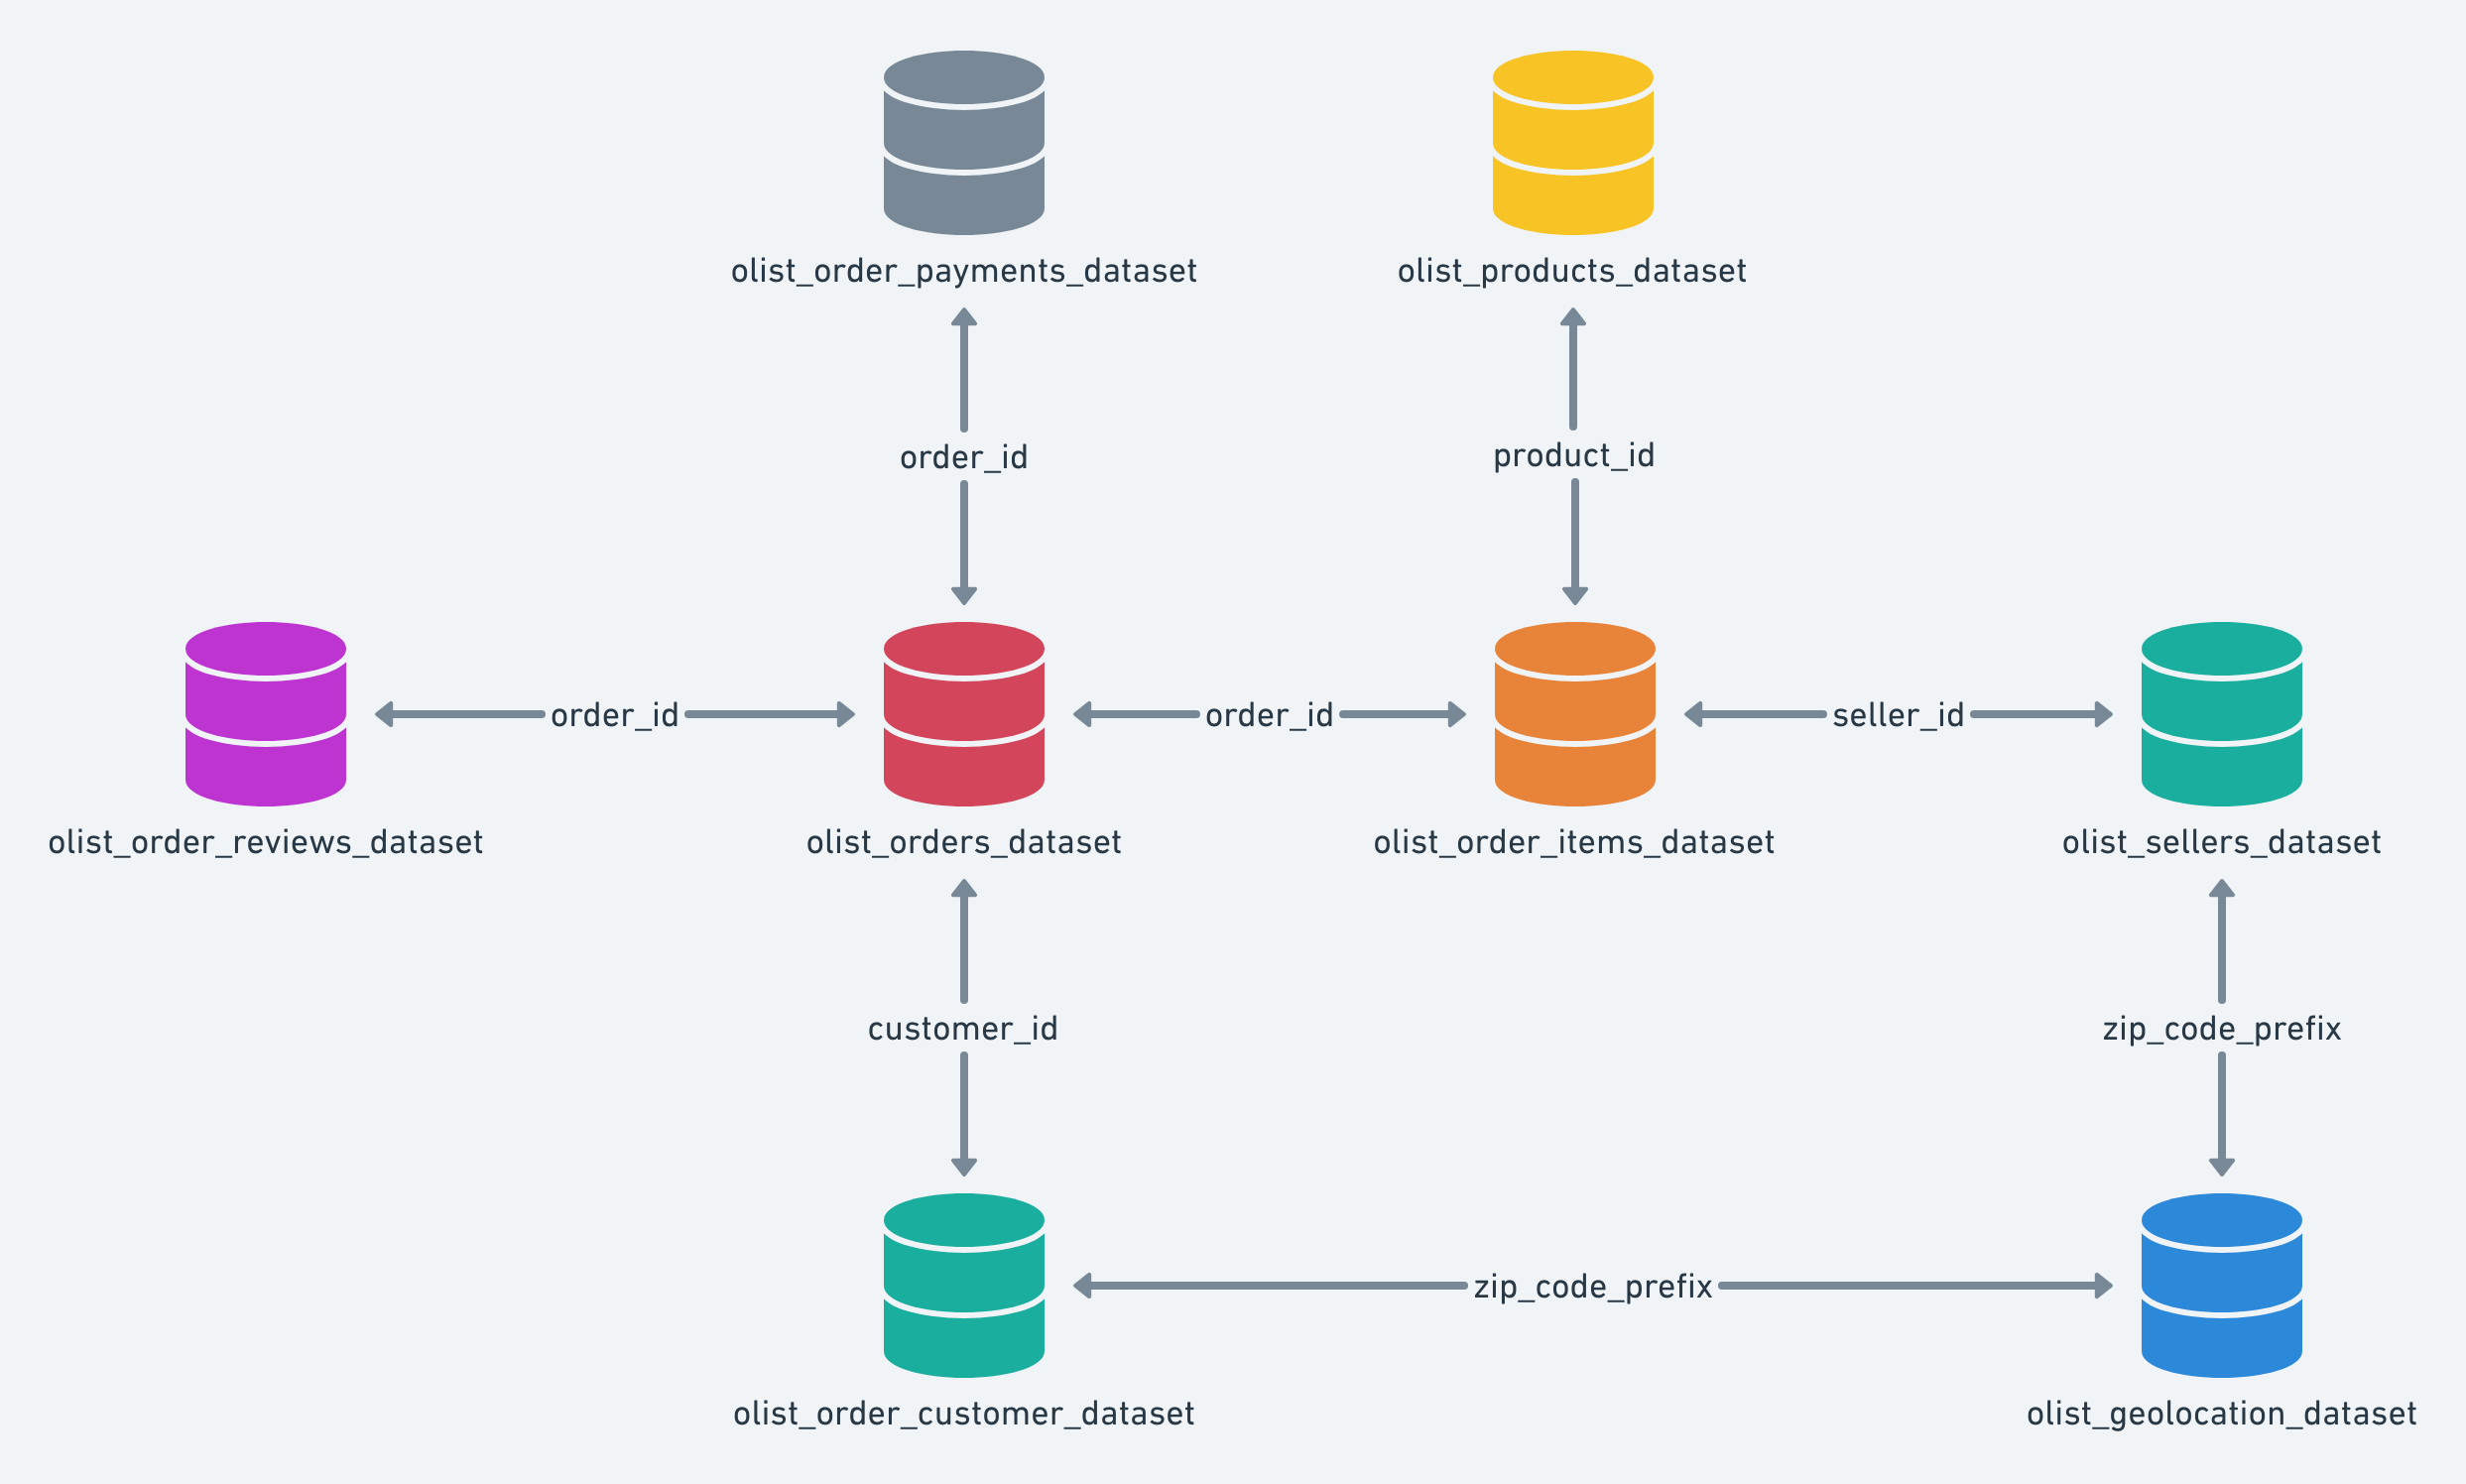

Para criar um Data Frame único, será necessário mesclar cada um desses bancos de dados com a função ``merge`` do Pandas.

In [3]:
# Montando o Data Frame
df = dados_do_pedido.merge(itens_do_pedido, on='order_id', how='left')
df = df.merge(dados_de_pagameto, on='order_id', how ='outer', validate = 'm:m')
df = df.merge(reviews_de_pedidos, on='order_id', how = 'outer')
df = df.merge(dados_de_produto, on='product_id', how='outer')
df = df.merge(dados_do_cliente,on='customer_id',how='outer')
df = df.merge(dados_do_vendedor, on='seller_id',how='outer') 

In [4]:
pd.set_option('display.max_columns', None)

## 2.3 Dicionário de atributos

In [5]:
# Observando caracteristicas do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

Criarei um dicionário para cada um dos atributos. Não usaremos todos, mas eles permaneceram no DataFrame para futuras análises e escolheremos apenas aqueles que trabalharemos por conveniência.

*  ``order_id``	-  ID do pedido               
*  ``customer_id`` -  ID do cliente          
*  ``order_status`` - Status do pedido          
*  ``order_purchase_timestamp`` - Tempo da compra do pedido
*  ``order_approved_at`` -   Tempo da aprovação do pedido           
*  ``order_delivered_carrier_date`` -   Tempo da entrega do pedido a transportadora
*  ``order_delivered_customer_date ``- Tempo da entrega do pedido ao cliente
*  ``order_estimated_delivery_date ``- Tempo estimado para entrega do pedido
*  ``order_item_id``- ID do item do pedido
*  ``product_id`` - ID do produto              
*  ``seller_id`` - ID do vendedor               
*  ``shipping_limit_date`` - Data limite para envio       
*  ``price`` – Preço do produto                        
*   ``freight_value`` - Valor do frete              
*   ``payment_sequential``    - Pagameto sequencial 
*   ``payment_type``      -Tipo de pagamento  
*   ``payment_installments``  Parcelas do pagamento
*   ``payment_value``  -Valor do pagamento
*   ``review_id``  - ID do review  do cliente                 
*   ``review_score``  - Pontuação do review do cliente              
*   ``review_comment_title`` - Título do review
*   ``review_comment_message`` - Mensagem do review 
*   ``review_creation_date``   - Data da criação do review  
*   ``review_answer_timestamp``  - Tempo de resposta do review
*   ``product_category_name``   - Nome da categoria do produto
*   ``product_name_lenght``  - Comprimento do nome do produto
*   ``product_description_lenght`` - Comprimento da descrição do produto  
*   ``product_photos_qty``   - Quantidade de fotos do produto       
*   ``product_weight_g``   - Peso do produto em gramas            
*   ``product_length_cm``  -   Comprimeto do produto em cm
*   ``product_height_cm`` -    Altura do produto em cm
*   ``product_width_cm``     - Largura do produto em cm         
*   ``customer_unique_id``    -    ID do cliente
*   ``customer_zip_code_prefix``  - Prefixo do CEP do cliente   
*   ``customer_city`` - Cidade do cliente             
*   ``customer_state``   - Estado do cliente             
*   ``seller_zip_code_prefix``  - Prefixo do CEP do vendedor       
*   ``seller_city``  - Cidade do vendedor               
*  ``seller_state`` - Estado do vendedor  






## 2.4 Tratando os Dados

### 2.4.1 Dados de São Paulo

Como mencionado anteriormente, trabalharemos apenas com dados do Estado de São Paulo. Desta forma, selecionaremos esses dados. 

In [6]:
# Selecioando apenas dados no estado de São Paulo
dfsp = df[df['customer_state'] == 'SP']

# Olhando a quantidade linhas e colunas do DF.
dfsp.shape

(50265, 39)

### 2.4.2 Dados nulos

Verificaremos agora o percentual de dados nulos. Aqueles que tiverem um percentual alto serão substituídos e os com percentual baixo serão excluídos. 

In [7]:
# Verificando a PORCENTAGEM de valores nulos por coluna e classiicando em ordem decrescente.
(dfsp.isnull().sum()/dfsp.shape[0]*100).sort_values(ascending=False) 

review_comment_title             87.866309
review_comment_message           59.536457
order_delivered_customer_date     2.892669
product_category_name             2.228191
product_name_lenght               2.228191
product_description_lenght        2.228191
product_photos_qty                2.228191
order_delivered_carrier_date      2.114792
product_width_cm                  0.803740
product_height_cm                 0.803740
product_weight_g                  0.803740
product_length_cm                 0.803740
freight_value                     0.795782
seller_state                      0.795782
price                             0.795782
seller_id                         0.795782
product_id                        0.795782
order_item_id                     0.795782
seller_zip_code_prefix            0.795782
seller_city                       0.795782
shipping_limit_date               0.795782
review_answer_timestamp           0.682383
review_score                      0.682383
review_crea

Analisando o percentual de dados ausentes, nota-se que o Título do review e as Mensagem do review tem uma ausência significativa, o que acaba gerando muitos valores nulos. 

In [ ]:
#Substituição dos valores nulos com percentual alto.
dfsp['review_comment_title'] = dfsp['review_comment_title'].fillna('No title')
dfsp['review_comment_message'] = dfsp['review_comment_message'].fillna('No message')

In [9]:
#Eiminção dos valores nulos(NaN)
dfsp_antes = dfsp.shape[0]
dfsp= dfsp.dropna()
dfsp_depois = dfsp.shape[0]
print('Quantidade de linhas ANTES da retirada dos valores nulos:', dfsp_antes)
print('Quantidade de linhas DEPOIS da retirada dos valores nulos:',dfsp_depois)
print(f'Foi eliminado um percetual de {(dfsp_antes-dfsp.shape[0])/dfsp_antes * 100:.3}% dos valores')

Quantidade de linhas ANTES da retirada dos valores nulos: 50265
Quantidade de linhas DEPOIS da retirada dos valores nulos: 47823
Foi eliminado um percetual de 4.86% dos valores


### 2.4.3 Conversão de Dados

Atentemos agora para os tipos das variáveis. Vejam que inúmeras datas estão no formato de string e por isso precisam ser convertidas. Para essa conversão utiliza-se a função to_datetime do Pandas

In [10]:
# Convertendo variáveis de tempo
dfsp['order_purchase_timestamp'] = pd.to_datetime(dfsp.order_purchase_timestamp)
dfsp['order_approved_at'] = pd.to_datetime(dfsp.order_approved_at)
dfsp['order_delivered_carrier_date'] = pd.to_datetime(dfsp.order_delivered_carrier_date)
dfsp['order_delivered_customer_date'] = pd.to_datetime(dfsp.order_delivered_customer_date)
dfsp['order_estimated_delivery_date'] = pd.to_datetime(dfsp.order_estimated_delivery_date)
dfsp['shipping_limit_date'] = pd.to_datetime(dfsp.shipping_limit_date)
dfsp['review_creation_date'] = pd.to_datetime(dfsp.review_creation_date)

### 2.4.4 Outliers e Valores inaplicáveis

Trataremos agora alguns **Outliers** e **Valores inaplicáveis** para essa análise.

Nas marketplaces do brasil são possíveis encontrar os mais diversos tipos de produtos, desde nave invisível da Mulher Maravilha até a nuvem voadora do Goku.

<img src='https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/nave_mulher_maravilha1.png?raw=true'></ceter>
<img src='https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/nuvem_goku.png?raw=true' ></ceter>






Produtos como esses podem gerar Outliers na análise. O foco será retirar aqueles valores que tornem inaplicáveis a utilização dos drones, como pesos e medidas que não são suportados por drones disponíveis no mercado.

Plotaremos um **Histograma** com variáveis de **peso** e **dimensão dos produtos** para inspecionar a viabilidade de transportar produtos por drones.

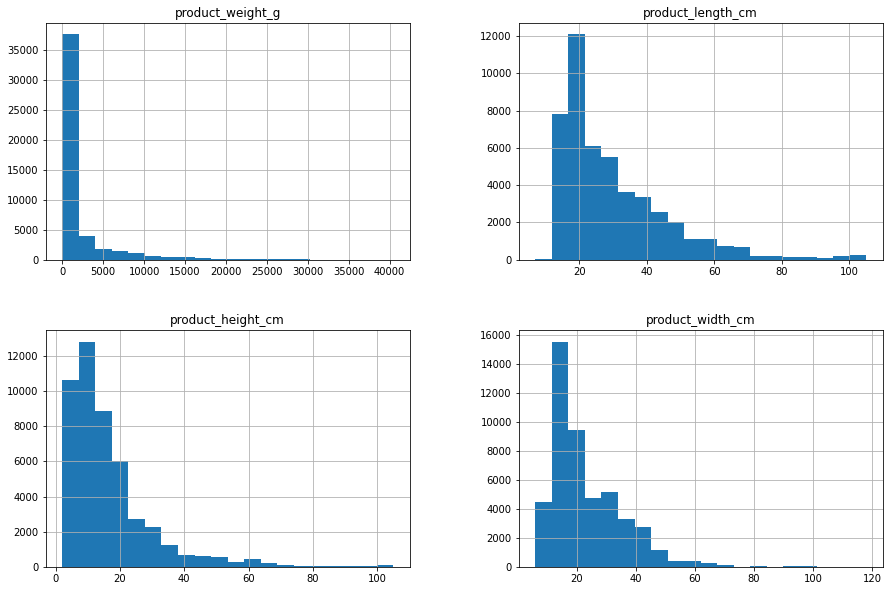

In [11]:
# Histograma com peso e dimensão dos produtos
dfsp[['product_weight_g','product_length_cm','product_height_cm','product_width_cm']].hist(bins=20,figsize=(15,10));

Percebe-se que os pesos da maioria dos produtos estão entre os suportados pelos drones. Os valores que ultrapassarem as 41000g serão desconsiderados já que é o maior peso suportado (DRARGO-1). Além disso, os produtos que tiverem dimensão superior a 80cm em qualquer uma das suas dimensões serão descartados pois existe a viabilidade das embalagens para transporte. Para nossa análise estamos considerando uma embalagem de acordo com imagem a seguir.

<img src='https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/IMG_20220524_120141.jpg?raw=true'>

In [12]:
# Adequação aos padrões da análise
dfsp1= dfsp[(dfsp['product_height_cm'] <= 80) & (dfsp['product_length_cm']<= 80) & (dfsp['product_width_cm'] < 80) & (dfsp['product_weight_g']< 41000) ]
# Porcentagem dos valores retirados
print(f"Para adequar aos padrões da analise foram retirados {(1-(dfsp1.shape[0]/dfsp_antes)) * 100 :.5} % dos dados. ")

Para adequar aos padrões da analise foram retirados 7.0626 % dos dados. 


### 2.4.5 Dados de Georreferenciamento

Para criar uma projeção mais realista possível, é necessário calcular a distância que o drone terá que percorrer entre o vendedor e o cliente. Todavia, essa distância terá um erro, já que as chamadas aerovias ainda estão em desenvolvimento. Essas aerovias para drones respeitaram regras da ANAC tal como a proibição de sobrevoo em áreas urbanas ou em rota de outras aeronaves. De todo modo, acreditando que essas aerovias ligaram todos os municípios do estado de São Paulo, a distância será calculada com base no CEP dos municípios entre vendedor e cliente.


In [13]:
# Verificando o banco de dados com os CEP's e Georeferenciamento
geolocalizacao.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Para o CEP de determinadas cidades de São Paulo precisaremos de um "the jump of cat", já que várias cidades têm mais de um prefixo de CEP. Para contornar esse problema, agruparemos os CEP’s de uma mesma cidade com a função ``groupby`` e retiraremos a média das latitudes e longitudes desse agrupamento.

In [ ]:
# Selecionando os dados de geolacalização de São Paulo
geo_state_sp = geolocalizacao[geolocalizacao['geolocation_state']=='SP']
# Agrupando os CEP 
geo_state = geo_state_sp.groupby('geolocation_city')['geolocation_lat','geolocation_lng'].mean().reset_index()

Criaremos agora dois bancos de dados com base no banco de dados de georreferenciamento para agrupar as cidades e os dados de latitude e longitude dos vendedores e clientes.

In [15]:
#Dados georreferenciamento para cliente
geo_customer = geo_state
geo_customer = geo_customer.rename(columns={'geolocation_city':'customer_city',
                                            'geolocation_lat': 'lat_customer',
                                            'geolocation_lng':'lon_customer'})

#Dados georreferenciamento para vendedores
geo_seller = geo_state
geo_seller = geo_seller.rename(columns={'geolocation_city':'seller_city',
                                        'geolocation_lat': 'lat_seller',
                                        'geolocation_lng':'lon_seller'})

In [16]:
# Agrupando os dados de Georeferenciamento para o DataFrame.
dfsp1 = dfsp.merge(geo_customer, how='left', on='customer_city')
new_dfsp = dfsp1.merge(geo_seller, how='left', on='seller_city')

Podemos visualizar os pontos de vendedores e clientes no mapa através do Folium

In [17]:
latitude = geo_state['geolocation_lat'].values
longitude = geo_state['geolocation_lng'].values
# Criando o Mapa
mapa = folium.Map(location=[-21.9915585,-46.9686072], zoom_start=7)
# Adcionando pontos ao mapa
for lat, lon in zip(latitude, longitude):
  folium.CircleMarker(location=[lat,lon], radius=1,color='blue',).add_to(mapa)
# Exibindo o Mapa
mapa
mapa.save('/content/drive/MyDrive/Colab Notebooks/mapa1.html') 

<center><img src="https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/mapa1.png?raw=true" > </center>

Ao plotar o gráfico, percebe-se que há alguns pontos fora do Estado de São Paulo. Isso se deve a estratégia em que adotamos para selecionar as transações no Estado. Se um vendedor for do estado, mas o cliente for de outro, haverá valores nulos para aquele que reside fora do estado de SP.

In [18]:
#vendo a qantidade de valores nulos
new_dfsp.loc[:,['lon_seller','lat_seller','lon_customer','lat_customer']].isnull().sum()

lon_seller      12439
lat_seller      12439
lon_customer        9
lat_customer        9
dtype: int64

In [19]:
#Excluindo valores nulos
new_dfsp = new_dfsp.dropna()

### 2.4.6 Distância percorrida.

Precisamos agora calcular a distância percorrida entre o cliente e o vendedor com base na latitude e longitude de ambos. Para isso, usaremos a biblioteca ```Haversine```

In [20]:
# Agrupando latitude e longitude de clientes e vendedores
seller = []
for i in zip(new_dfsp['lon_seller'],new_dfsp['lat_seller']):
  seller.append(i)

customer = []
for i in zip(new_dfsp['lon_customer'],new_dfsp['lat_customer']):
  customer.append(i)

In [21]:
# Verificando A quantidade de valores em Seller e Customer
print('Total de cordenadas de Vededores disponível:',len(seller))
print('Total de cordenadas de Clientes disponível:',len(customer))

Total de cordenadas de Vededores disponível: 35376
Total de cordenadas de Clientes disponível: 35376


In [22]:
#Calculando a distância
distance = []
for i in range(0,35376):
  distance.append(haversine(seller[i],customer[i]))

new_df1 = new_dfsp.assign(dist = distance)
new_df1.reset_index(drop=True, inplace=True)
new_df1.loc[:,['lon_seller','lat_seller','lon_customer','lat_customer','dist']].head()


,lon_seller,lat_seller,lon_customer,lat_customer,dist
0,-46.448909,-23.669994,-46.633242,-23.57086,21.854338
1,-46.448909,-23.669994,-46.633242,-23.57086,21.854338
2,-46.448909,-23.669994,-46.633242,-23.57086,21.854338
3,-46.448909,-23.669994,-46.633242,-23.57086,21.854338
4,-46.448909,-23.669994,-46.633242,-23.57086,21.854338


# 3. DRONES 

Criaremos agora modelos fictícios para fazermos nossas entregas. Cada modelo tem particularidades de cargas e distâncias suportadas.  A velocidade de cruzeiro desses modelos serão padronizadas em 80km/h, mas podem facilmente ultrapassar esse valor em parâmetros reais. 

In [23]:
#Caracteristicas dos drones
drone = {'modelo': ['DRARGO-1','DRARGO-2','DRARGO-3','DRARGO-4','DRARGO-5'], 
         'velocidade': [80,80,80,80,80], 
         'peso_suportado_g': [41000,37000,34000,30000,17000],
         'distancia_max_km': [100,200,300,400,700]
         }
drone = pd.DataFrame(drone).set_index('modelo')
drone

,velocidade,peso_suportado_g,distancia_max_km
modelo,,,
DRARGO-1,80,41000,100
DRARGO-2,80,37000,200
DRARGO-3,80,34000,300
DRARGO-4,80,30000,400
DRARGO-5,80,17000,700


Vamos agora classificar as viagens para cada modelo com base no peso da carga e da distância que deve ser percorrida. Em seguida criaremos uma coluna no DataFrame para essa classificação.

In [24]:
p1 = drone.at['DRARGO-1','peso_suportado_g']
p2 = drone.at['DRARGO-2','peso_suportado_g']
p3 = drone.at['DRARGO-3','peso_suportado_g']
p4 = drone.at['DRARGO-4','peso_suportado_g']
p5 = drone.at['DRARGO-5','peso_suportado_g']

d1 = drone.at['DRARGO-1','distancia_max_km']
d2 = drone.at['DRARGO-2','distancia_max_km']
d3 = drone.at['DRARGO-3','distancia_max_km']
d4 = drone.at['DRARGO-4','distancia_max_km']
d5 = drone.at['DRARGO-5','distancia_max_km']

#Criando as condiçoes para classificar qual drone fará a viagem
condition = [
((new_df1['product_weight_g'] < p1) & (new_df1['dist'] < d1)),
((new_df1['product_weight_g'] < p2) & (new_df1['dist'] < d2)),
((new_df1['product_weight_g'] < p3) & (new_df1['dist'] < d3)),
((new_df1['product_weight_g'] < p4) & (new_df1['dist'] < d4)),
((new_df1['product_weight_g'] < p5) & (new_df1['dist'] < d5))
]

model = ['DRARGO-1','DRARGO-2','DRARGO-3','DRARGO-4','DRARGO-5']

In [25]:
#criando a coluna de classificação de Modelo
new_df1['drone'] = np.select(condition, model, default="sem_modelo_diponivel")

# 4. RESULTADOS

Antes de começarmos nossa análise, vamos olhar os pontos do mapa anteriormente plotado e classificaremos os pontos de vendedores e clientes no mapa.  

In [26]:
x_customer = new_dfsp['lat_customer'].values
y_customer = new_dfsp['lon_customer'].values

x_seller = new_dfsp['lat_seller'].values
y_seller = new_dfsp['lon_seller'].values

apam = folium.Map(location=[-21.9915585,-46.9686072], zoom_start=7)
for lat, lon in zip(x_customer,y_customer):
  folium.CircleMarker(location=[lat,lon],radius=1).add_to(apam)

for lat, lon in zip(x_seller,y_seller):
  folium.CircleMarker(location=[lat,lon], color='red', radius=1).add_to(apam)

apam.save('/content/drive/MyDrive/Colab Notebooks/map.html')  

<img src='https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/Captura%20de%20tela%202022-05-03%20104534.png?raw=true'>

Em vermelho estão os vendedores e em azul os clientes.

### 4.1 Número de viagens

Como a maioria das viagens são de curta distância, o DRARGO-1 será responsável por boa parte dessas viagens. Isso pode ser visto através de um gráfico de Waffle. 

In [27]:
new_df1['drone'].value_counts()

DRARGO-1                19476
DRARGO-3                 6158
DRARGO-2                 5513
DRARGO-4                 2343
DRARGO-5                 1849
sem_modelo_diponivel       37
Name: drone, dtype: int64

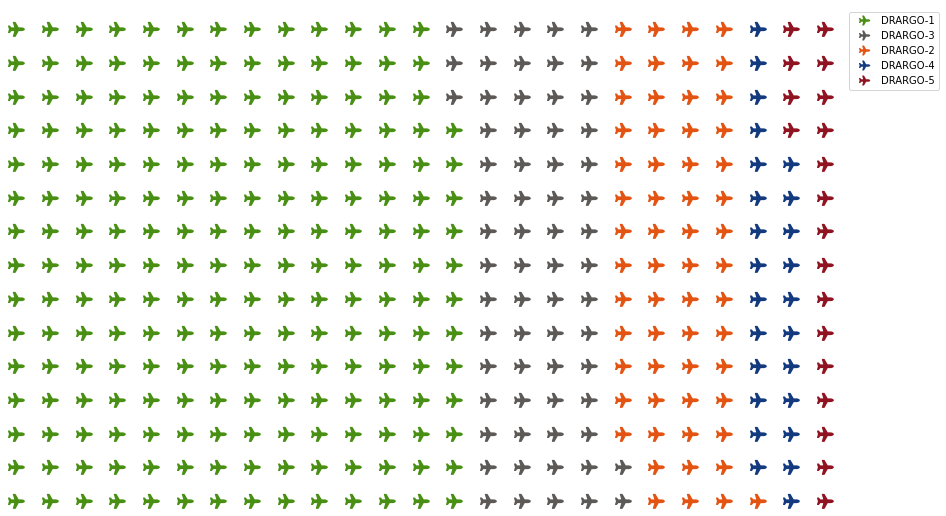

In [28]:
# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=15,
                columns=25,
                colors=("#488f13", "#5c5957", "#e35412", '#133a7f' , "#8f1320" ),
                values={'DRARGO-1':19476, 'DRARGO-3':6158, 'DRARGO-2': 5513, 'DRARGO-4': 2343, 'DRARGO-5':1849}, 
                icons='plane', 
                icon_size=15,
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
                icon_legend=True,
                figsize=(15,30)
                )
fig.set_tight_layout(False)
plt.show();

### 4.2 Áreas de maior tráfego 

As maiores cidades do Estado são São Paulo, Guarulhos e Campinas. Logo, espera-se que o maior tráfego de drones ocorreriam por essa região, isso é visto através de mapa de calor. 

In [29]:
# Crriando um Mapa de Calor onde ocorrerá maio quantidade de compras e consequentemente maior tráfego aéreo de Drones
locais = []
heatmap = folium.Map(location=[-21.9915585,-46.9686072], zoom_start=7)

for index, linha in new_dfsp.iterrows():
  temp = [new_dfsp['lat_customer'].values,new_dfsp['lon_customer'].values]
  locais.append(temp)

locais = new_dfsp[['lat_customer','lon_customer']].values.tolist()
HeatMap(locais, radius=20, min_opacity=0.4).add_to(heatmap)

heatmap.save('/content/drive/MyDrive/Colab Notebooks/maior_trafego.html')

<center><img src='https://github.com/ronaldolg26/Efeito_drones_saopaulo/blob/main/mapa_de_calor.png?raw=true' ></center>

### 4.3 Redução do tempo de entrega

Faremos agora uma estimação da redução do tempo de entrega se ele fosse executado por drones. Para isso, precisaremos saber quanto tempo total foi gasto para entregar os produtos com métodos convencionais. 

In [30]:
#Calculando o tempo total gasto para as entregas
Td = 0
Td_residual = 0
for i in range(0,new_df1.shape[0]):
    T = new_df1['order_delivered_customer_date'][i] - new_df1['order_delivered_carrier_date'][i]
    Td = Td + T.days
    Td_residual = Td_residual + ((T.seconds)/3600)/24

T_Convencional = (Td + Td_residual)*24
print(f'Foram gastos {T_Convencional/24 :.8} dias para transportar todos os produtos \nUm total de {T_Convencional :.9} Horas')

Foram gastos 167102.12 dias para transportar todos os produtos 
Um total de 4010450.89 Horas


Utilizando a função da velocidade média Vm = Distância (km)/Tempo(h) calcularemos o tempo gasto dessas viagens se elas fossem feitas por um DRARGO. Estimando que a velocidade fosse 80km/h teríamos o seguinte resultado:

In [31]:
T_Drone = new_df1['dist'].apply(lambda x: x/80)
print(f'Total em horas gastos pelos DRARGOS: {T_Drone.sum() :.8}h')

Total em horas gastos pelos DRARGOS: 59512.042h


Todavia, sabe-se que há inúmeros contratempos na execução. Cita-se, como exemplo, o carregamento da mercadoria, os corredores aéreos não retilíneos, o possível tráfego aéreo de drones que existirá... Desta forma, optamos por aumentar esse tempo em 3x mais.

In [32]:
tempo_drone = T_Drone.sum() * 3
print(f'Total em horas gastos pelos DRARGOS: {tempo_drone.sum() :.8}h')

Total em horas gastos pelos DRARGOS: 178536.13h


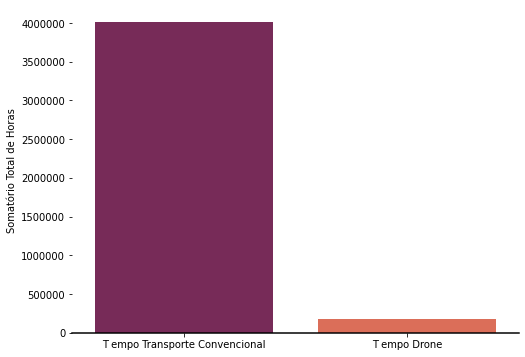

In [33]:
#Plotando o gráfico
tt = ['T empo Transporte Convencional','T empo Drone']
val = [T_Convencional,tempo_drone]
f, (ax1) = plt.subplots(1, figsize=(8, 6), sharex=True)
x = np.array(tt)
y1 = val
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
sns.despine(bottom = True, left = True) 
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Somatório Total de Horas")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [34]:
print(f"Isso representa uma redução de {(1-(tempo_drone/T_Convencional))*100 :.4}% do Tempo quando comparado com métodos convencionais")

Isso representa uma redução de 95.55% do Tempo quando comparado com métodos convencionais


In [35]:
print(f'A quantidade média de horas gastas será de {T_Drone.mean() :.4}h')

A quantidade média de horas gastas será de 1.682h


## 4.4 Distância percorrida por cada modelo

Apesar do modelo DRARGO-1 ser o modelo que mais executou viagens, como mostra o gráfico de Waffle, o DRARGO-3 percorrerá maiores distâncias e consequentemente passará mais tempo voando. Isto pode ser comprovado pelo o total da distância que cada modelo irá percorrer. 

In [37]:
#Agrupando valores com base no modelo do drone e aplicando o somatório
df_drone_sum = new_df1[new_df1['drone'] !='sem_modelo_diponivel'].groupby('drone').sum()
df_drone_sum

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_zip_code_prefix,seller_zip_code_prefix,lat_customer,lon_customer,lat_seller,lon_seller,dist
drone,,,,,,,,,,,,,,,,,,,,,
DRARGO-1,23715.0,1894196.17,229676.54,21072.0,47913.0,2641281.73,81893.0,945213.0,15023029.0,46151.0,38446512.0,570210.0,320452.0,434643.0,150070084,146174490.0,-456243.044597,-910233.410692,-456093.891913,-909930.411889,6.974747e+05
DRARGO-2,6564.0,566288.84,78078.83,5825.0,15364.0,796845.77,23266.0,273519.0,4009191.0,11404.0,11782192.0,168672.0,86570.0,132136.0,65369481,63720507.0,-126302.549620,-259889.623768,-125676.661866,-261099.683693,7.757930e+05
DRARGO-3,7573.0,628037.03,90383.50,7169.0,18569.0,910207.74,25067.0,304622.0,4039359.0,10796.0,11016201.0,197107.0,87932.0,155082.0,58135770,81543943.0,-141793.621453,-290407.809249,-135524.811390,-296331.032700,1.563689e+06
DRARGO-4,2859.0,238217.85,36486.31,2456.0,6710.0,359274.89,9783.0,119829.0,1470105.0,4785.0,5267545.0,75960.0,40792.0,60300.0,28509871,29484255.0,-53185.577778,-111987.733103,-51864.630175,-113001.267798,8.144626e+05
DRARGO-5,2355.0,157019.06,27456.71,2179.0,5076.0,256813.61,7726.0,92910.0,1444665.0,4372.0,3358384.0,56753.0,31044.0,42298.0,23919205,22589280.0,-41501.495490,-89916.904044,-41540.646714,-89702.210503,8.919409e+05


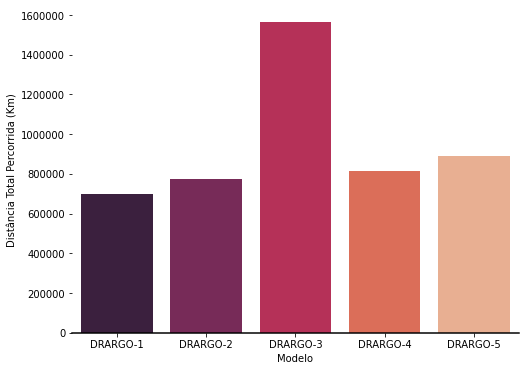

In [38]:
f, (ax3) = plt.subplots(1, figsize=(8, 6), sharex=True)
x3 = df_drone_sum.index
y3 = df_drone_sum['dist']
sns.barplot(x=x3, y=y3, palette="rocket", ax=ax3)
sns.despine(bottom = True, left = True)
#plt.tick_params(axis ='y', labelsize=2, length = 0) 
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Distância Total Percorrida (Km)")
ax3.set_xlabel("Modelo")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Aumentar a resistência do DRARGO-3 poderia ser uma boa medida adotada pela empresa.

## 4.5 Uma visão sobre os fretes.

Podemos olhar também para onde teremos a maior redução no valor do frete. Se somarmos o valor do frete em que determinando modelo foi usado, obteremos o modelo que terá o maior potencial de redução desse valor.

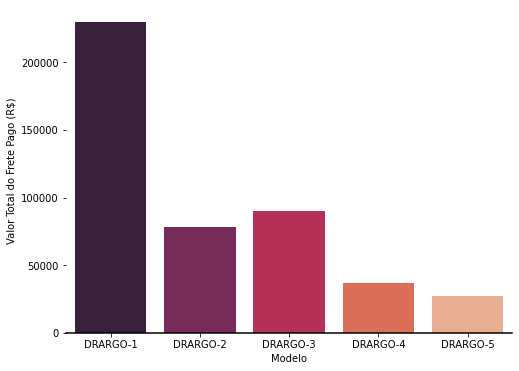

In [39]:
f, (ax4) = plt.subplots(1, figsize=(8, 6), sharex=True)
x4 = df_drone_sum.index
y4 = df_drone_sum['freight_value']
sns.barplot(x=x4, y=y4, palette="rocket", ax=ax4)
sns.despine(bottom = True, left = True)
#plt.tick_params(axis ='y', labelsize=2, length = 0) 
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("Valor Total do Frete Pago (R$)")
ax4.set_xlabel("Modelo")
plt.show()

Como é visto no gráfico acima, o DRARGO-1 poderá reduzir significativamente o valore do frete. Isso se deve porque o valor do frete leva em consideração inúmeros fatores como o valor da carga, as características do produto, as características do destinatário, peso, entre outros. Além disso, o valor do frete para São Paulo não aumenta proporcionalmente com a distância. Vejamos o gráfico de dispersão do valor do frete X distância.

''

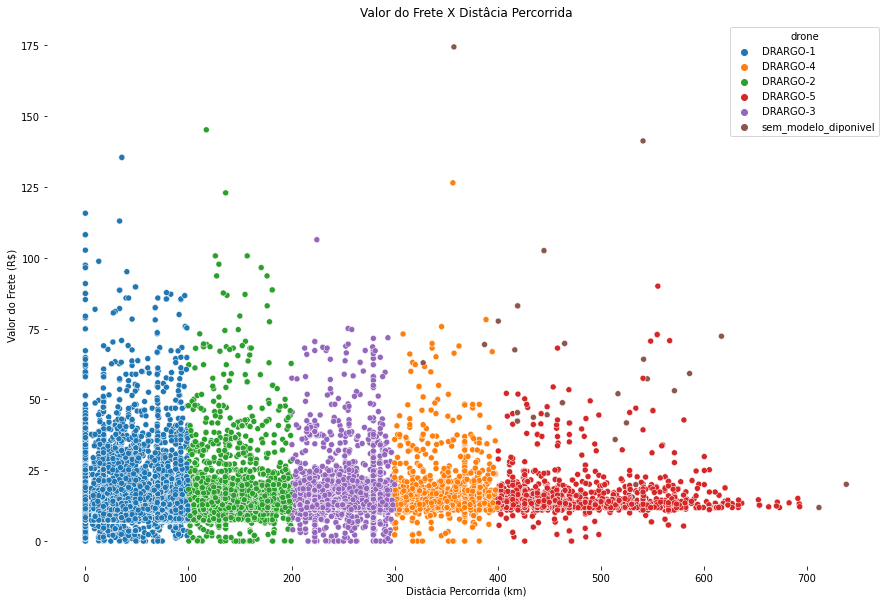

In [40]:
f, ax5 = plt.subplots(figsize=(15, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x='dist', y='freight_value',
                data=new_df1,
                hue='drone',
                ax=ax5)
ax5.set_title('Valor do Frete X Distâcia Percorrida')
ax5.set_ylabel('Valor do Frete (R$)')
ax5.set_xlabel('Distâcia Percorrida (km)')
;

## 4.6 Maior movimentação de valores

Há a possibilidade de encontrarmos qual drone transportou o maior vulto de valores através do somatório do preço das mercadorias transportadas.

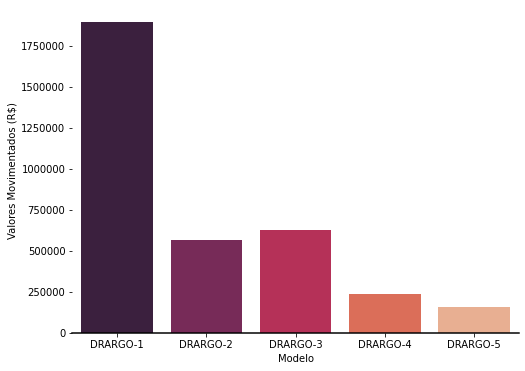

In [41]:
f, (ax6) = plt.subplots(1, figsize=(8, 6), sharex=True)
x6 = df_drone_sum.index
y6 = df_drone_sum['price']
sns.barplot(x=x6, y=y6, palette="rocket", ax=ax6)
sns.despine(bottom = True, left = True)
ax6.axhline(0, color="k", clip_on=False)
ax6.set_ylabel("Valores Movimentados (R$)")
ax6.set_xlabel("Modelo")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# 5 CONCLUSÃO

A utilização de drones para entregas do e-commerce é um dos meios mais promissores do mercado e que está em evolução. Inúmeras barreiras ainda precisam ser superadas para que a sua utilização seja efetivada em grande escala. Dados de uma pesquisa da Propeller Insights com mais de mil pessoas mostram que a maior preocupação dos usuários está na segurança dos produtos com possíveis danos na viagem, entregas em locais errados ou furtos e roubos dos produtos. Todavia, a mesma pesquisa aponta que 48% dos clientes pagariam mais se a entrega fosse feita em até 1 hora, o que foi demonstrado ser possível para grande parte dos produtos. A utilização de drones irá impactar como vemos o e-commerce e trará novas perspectivas de mercado no futuro, apostar nesse segmento é uma medida estratégica de quem comercializa seus produtos na internet e das grandes empresas fabricantes de drones.